# Case Study Human Resources
## Analyze Employee Attrition

Using a realistic employee data set, I analyze it regarding employee attrition.
I ask and try to answer questions like:
- Who leaves?
- Why do they leave?
- What prevents employees from leaving?

Tools and frameworks that I used:
- Pandas
- Matplotlib and Seaborn

*Data and inspiration from: https://www.udemy.com/course/data-science-for-business-6-real-world-case-studies/*

### 1. Import, analyze and pre-clean data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# You have to include the full link to the csv file containing your dataset
employee_df = pd.read_csv('Human_Resources.csv')

In [6]:
# Analyze raw data set
# Find mean of employee age
employee_df.describe()
employee_df.dtypes.value_counts()
employee_df.info()
print('\nMean age of employees: ',round(employee_df.Age.mean(),2), ' years.')
employee_df.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


int64     26
object     9
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [7]:
def data_clean(df):
    # Replace 'Attritition' , 'overtime' , 'Over18' yes/no values for visualization
    df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
    df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
    df['Over18'] = df['Over18'].apply(lambda x:1 if x == 'Y' else 0)
    return df

employee_df = data_clean(employee_df)

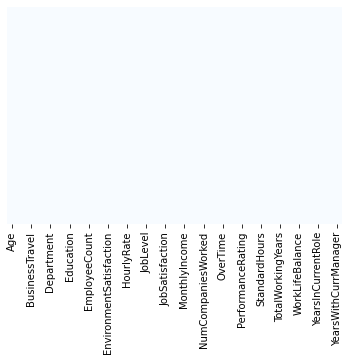

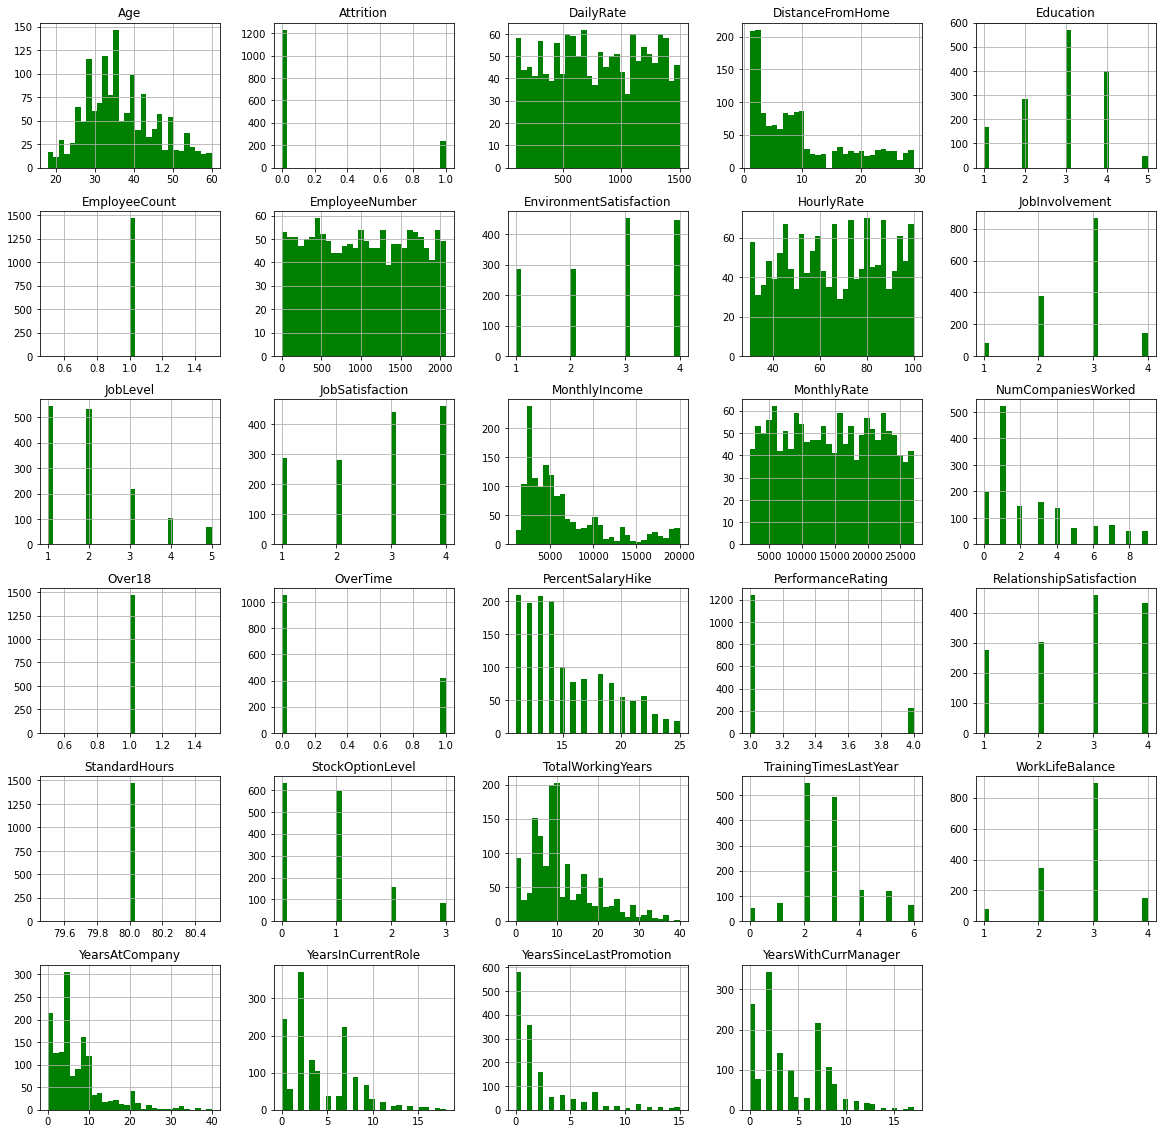

In [9]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
# No data in heatmap --> data has no null values 

employee_df.hist(bins=30, figsize=(20,20), color='green');

#### Observation from histograms
- Several features only have a single value and can safely be removed:
    - StandardHours, Over18, EmployeeCount
    
#### Other feature engineering tasks
- Obviously irrelevant features should be removed:
    - EmployeeNumber

In [10]:
employee_df.drop(['StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)

In [14]:
# Create df for stayers and leavers
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]
left_df.Attrition.sum()
stayed_df.Attrition.count()
print('Percentage of employees who left = ', round(len(left_df)/len(employee_df)*100,2), '%')
print('Percentage of employees who stayed = ', round(len(stayed_df)/len(employee_df)*100,2), '%')

237

1233

Percentage of employees who left =  16.12 %
Percentage of employees who stayed =  83.88 %


In [15]:
# Compare mean and std of features between stayers and leavers
left_df.describe()
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


#### Observation from comparison left vs. stayed
Leavers...
- are younger by 4 years (mean Age lower)
- earn less (DailyRate ~62 lower)
- commute further (DistanceFromHome 1.7 higher)
- have lower JobLevels (mean 0.7 lower)
- have less StockOptionLevel (~0.3 lower)
- worked less in total (3.6 years less)
- were at the company for a shorter time (2.2 years less)- 

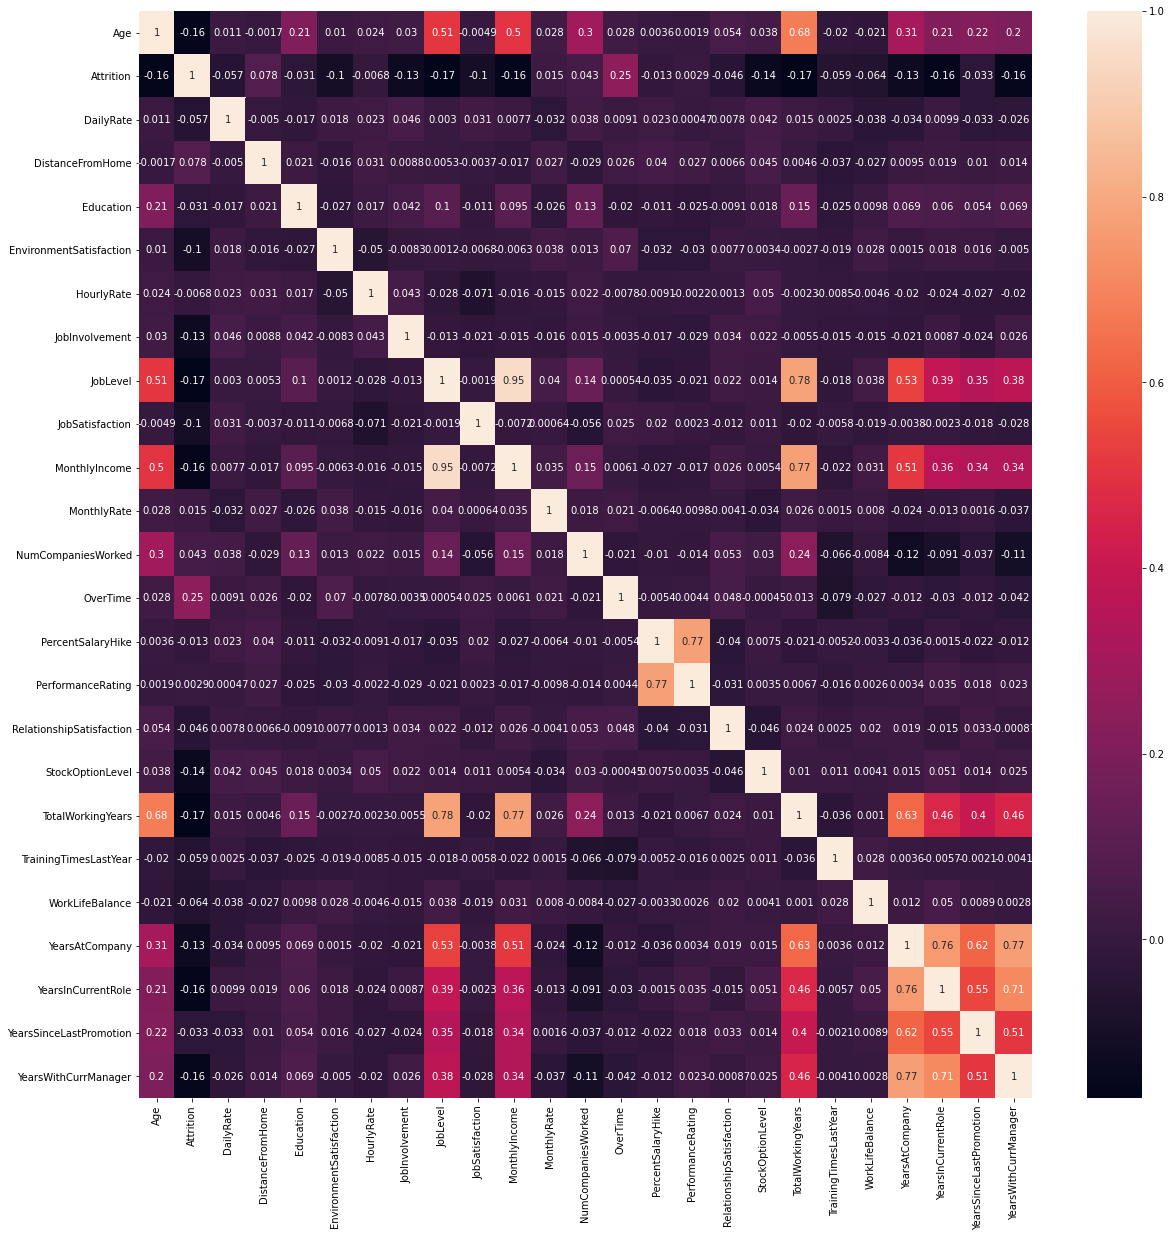

In [23]:
# Create heatmap of feature correlation
correlations = employee_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

#### Observation from box plots
- Highest correlation with Attrition by OverTime, followed by DistanceFromHome
- All other features have almost no correlation with Attrition
- TotalWorkingYears strongly correlates with JobLevel and MonthlyIncome
- Age strongly correlates with YearsAtCompany, YearsinCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TotalWorkingYears, MonthlyIncome, JobLevel, Education and NumCompaniesWorked

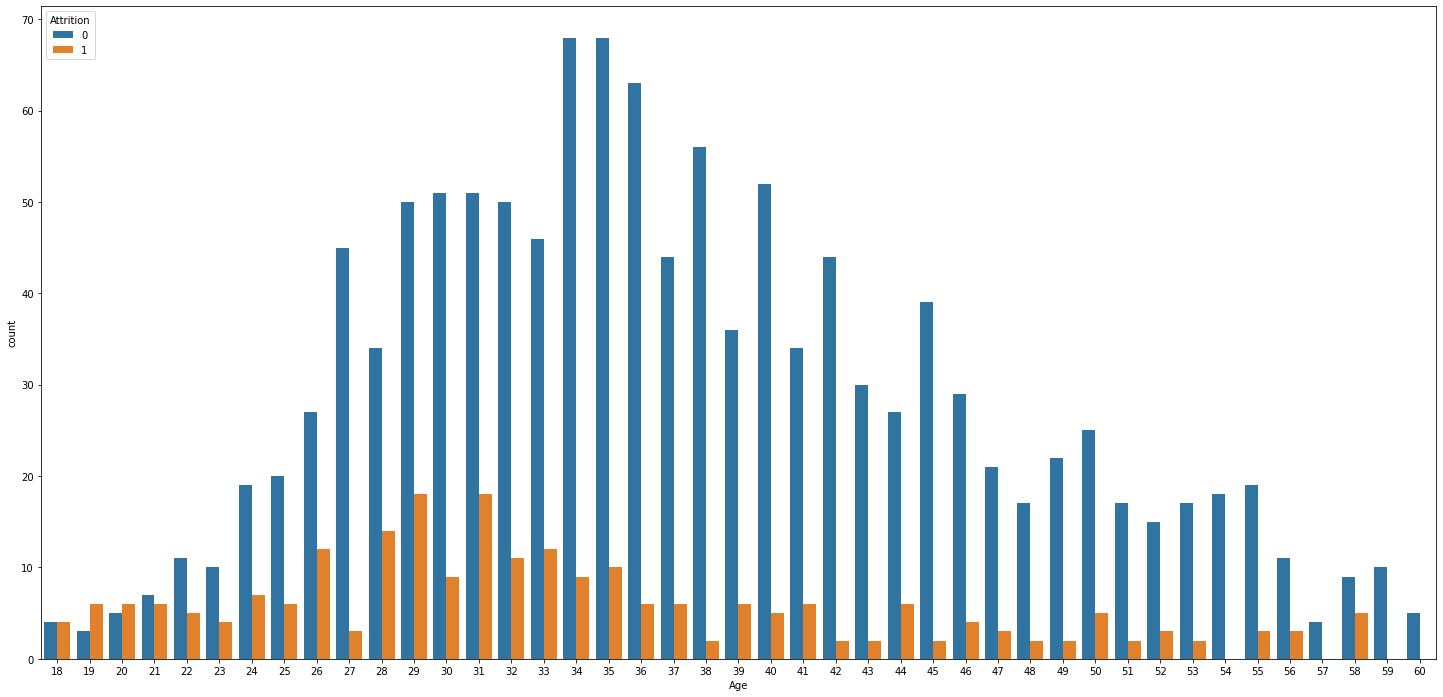

In [22]:
# Visualize attrition by age
plt.figure(figsize=[25,12])
sns.countplot(x='Age', hue='Attrition', data=employee_df);

#### Observation from attrition by age plot
- Age group from mid 20s to mid 30s are most likely to leave, both in absolute and relative numbers

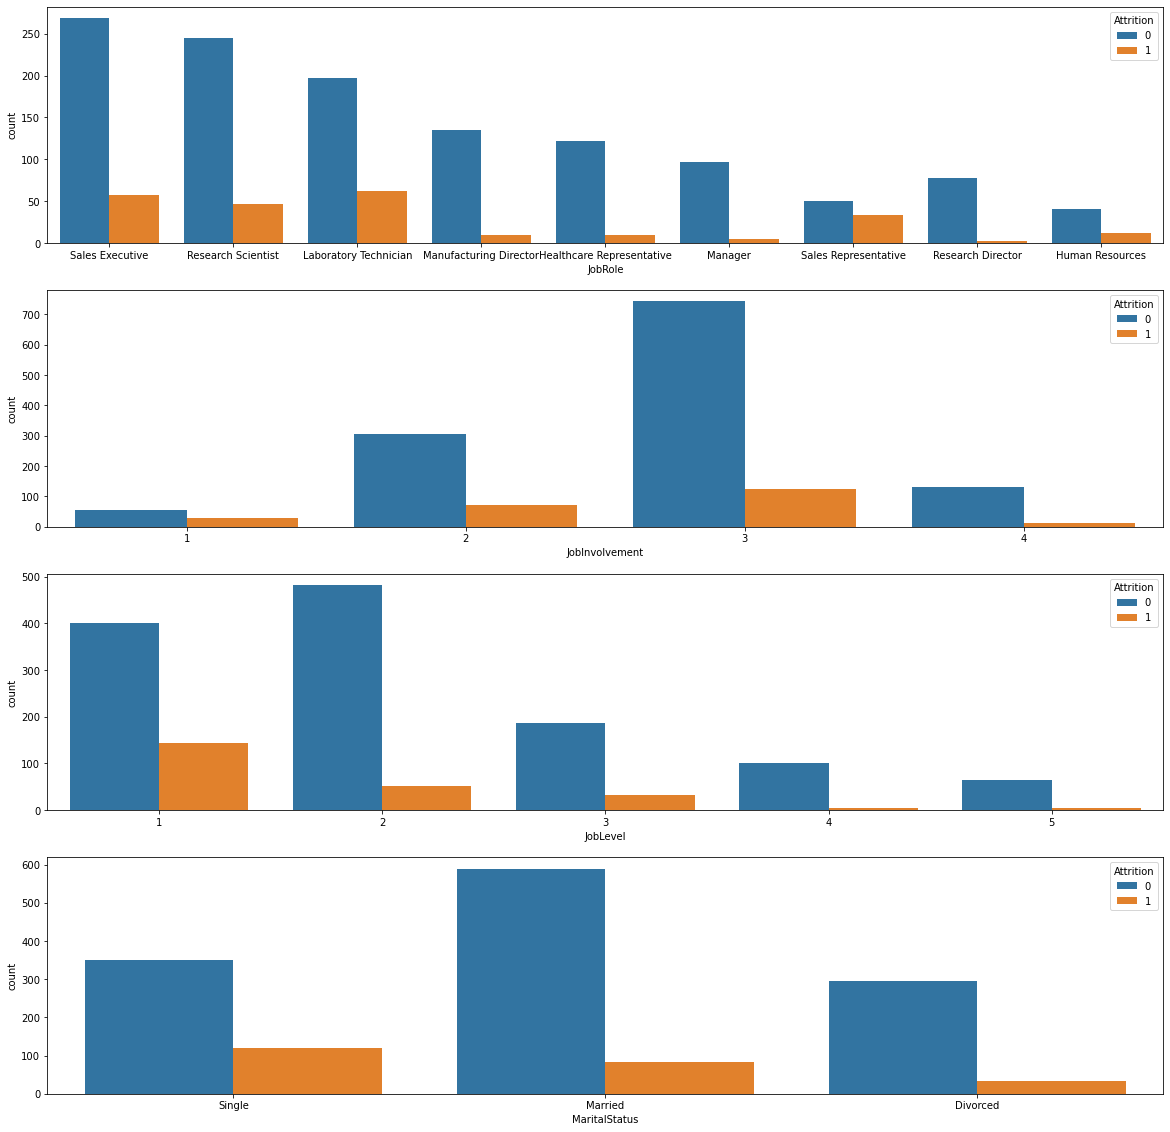

In [18]:
# Visualize several features at once
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
plt.subplot(412)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)
plt.subplot(413)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
plt.subplot(414)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df);

#### Observation from bar charts
- Sales Reps are very likely to leave
- Managers and Directors hardly ever leave
- Top level employees hardly ever leave
- Singles leave far more often than people with family ties
- Low job involvement makes people leave

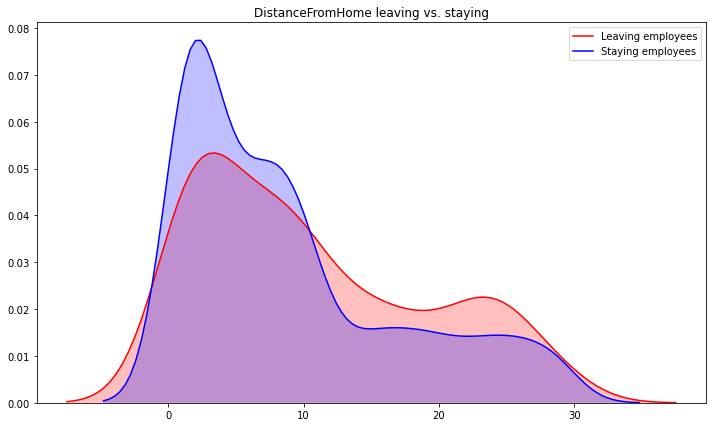

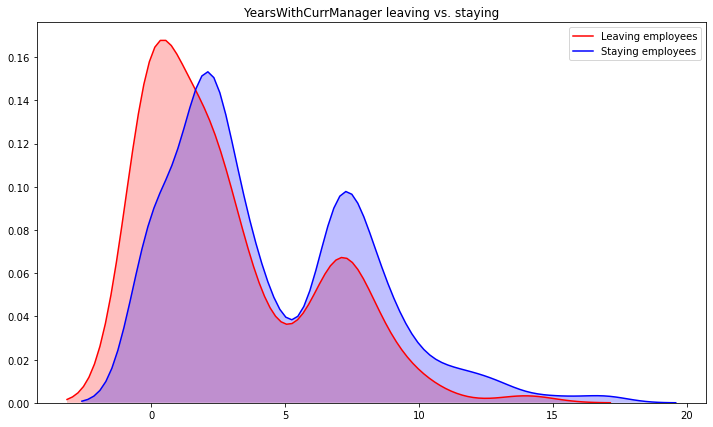

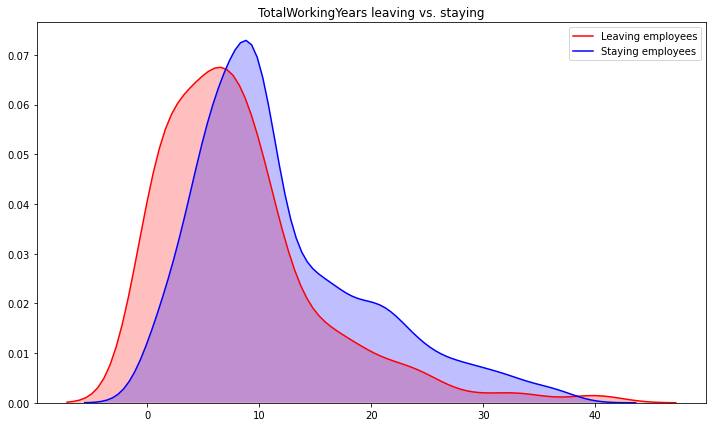

In [25]:
# KDE (Kernal Density Estimation)
plt.figure(figsize=(12,7))
plt.title('DistanceFromHome leaving vs. staying')
sns.kdeplot(left_df['DistanceFromHome'], label='Leaving employees', shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Staying employees', shade=True, color='b')
plt.figure(figsize=(12,7))
plt.title('YearsWithCurrManager leaving vs. staying')
sns.kdeplot(left_df['YearsWithCurrManager'], label='Leaving employees', shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Staying employees', shade=True, color='b')
plt.figure(figsize=(12,7))
plt.title('TotalWorkingYears leaving vs. staying')
sns.kdeplot(left_df['TotalWorkingYears'], label='Leaving employees', shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Staying employees', shade=True, color='b');

#### Observation from kernel density plots
- DistanceFromHome of over 20 is especially risky
- Not changing responsible manager might keep employees at company
- Less experiences employees leave more often

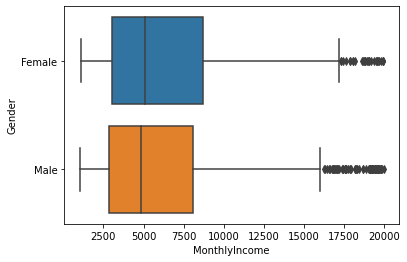

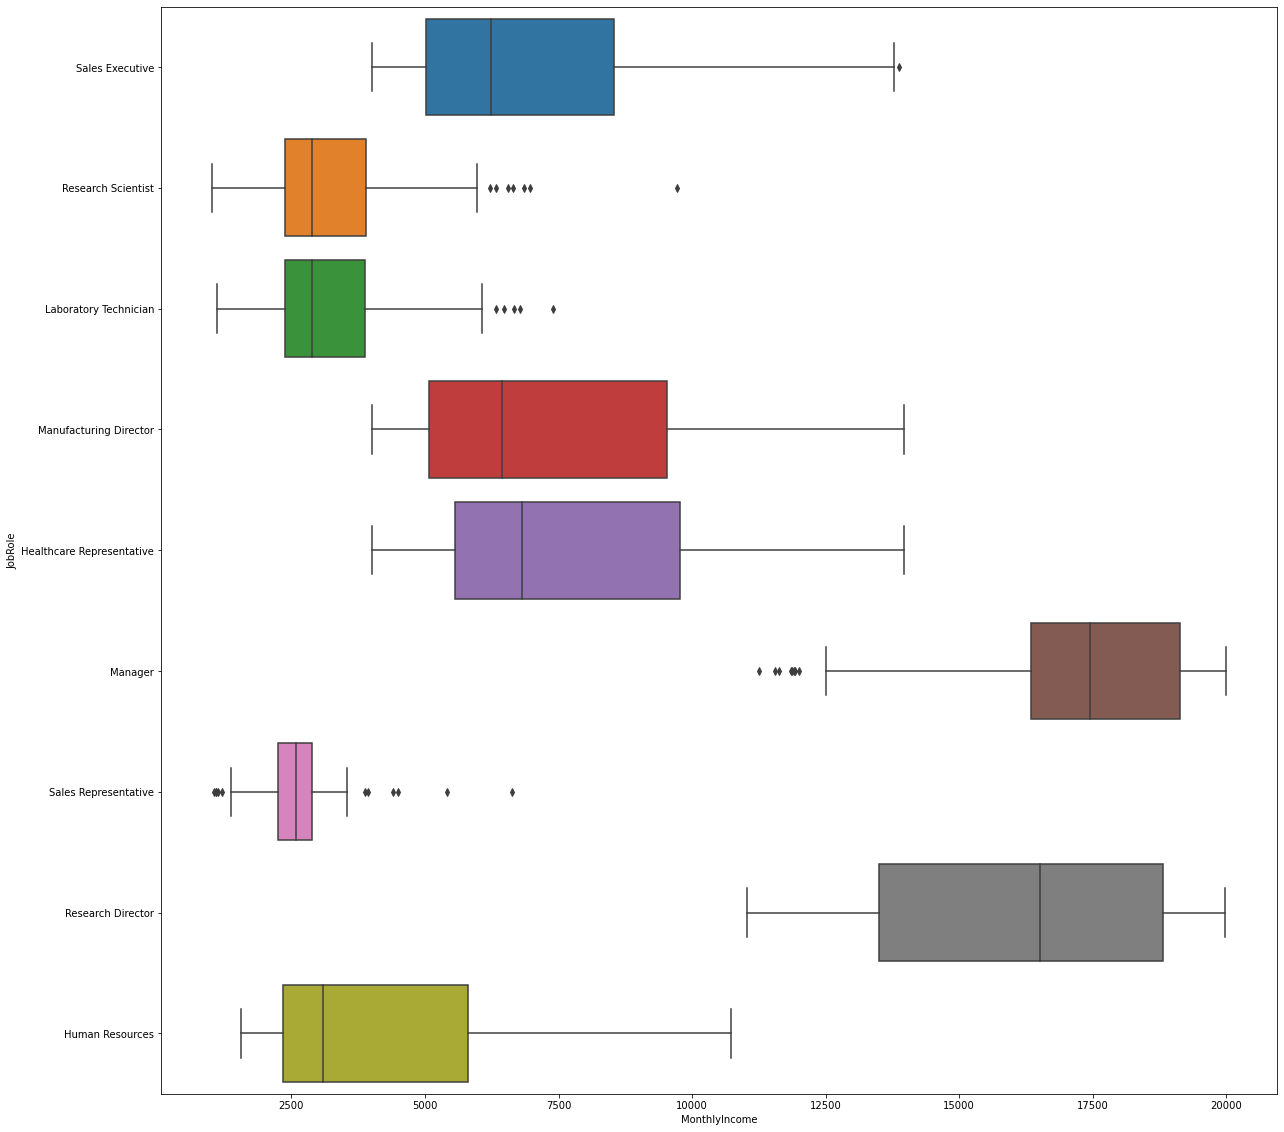

In [21]:
# Box plot
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)
plt.figure(figsize=(20,20))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df);

#### Observation from box plots
- MonthlyIncome not strongly influenced by gender
- Low MonthlyIncome spread in JobRole with highest Attrition (Sales Rep)

### 2. Prepare for ML algorithms

In [26]:
# Extract (binary) categorical features and encode them
X_cat = employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat.shape
X_cat = pd.DataFrame(X_cat)

X_numerical = employee_df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

X_all = pd.concat([X_cat, X_numerical], axis=1)

X_all.head(3)

(1470, 26)

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0


In [33]:
# Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

X[0]

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
       0.33333333, 0.91428571, 0.66666667, 0.25      , 0.26245392,
       0.6980526 , 0.88888889, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.2       , 0.        , 0.        ,
       0.15      , 0.22222222, 0.        , 0.29411765])